In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
# Consider aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'font.size': 18})

We define four functions:
1. `show_image` that plots images via the matplotlib library, if the image is colored then we convert the default Blue, Green, Red channel order to the Red, Green, Blue that matplotlib expects.
2. `plot_channel_histograms` which creates a figure with three subplots corresponding to the histrogram of each of the image channels passed as input.
3. `show_channel_images` works simialr to `shpw_image` but plots the image as described by each of the  channels passed as input.

4. `calculate_channel_hist` utilizes the cv2 library to calculate the histrograms for each channel passed as input.

In [1]:
def calculate_channel_hist(img, grayscale = False):
  if grayscale:
    intensity = cv2.calcHist([img],[0],None,[256],[0,256])
    return intensity
  else:
    channel1 = cv2.calcHist([img[:,:,0]],[0],None,[256],[0,256])
    channel2 = cv2.calcHist([img[:,:,1]],[0],None,[256],[0,256])
    channel3 = cv2.calcHist([img[:,:,2]],[0],None,[256],[0,256])
    return channel1,channel2,channel3

def show_image(img,title, grayscale = False):
  if not grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize = (10,6))
  plt.imshow(img, cmap ="gray")
  plt.axis('off')
  plt.title(title)
  plt.show()

def compare_images(img1, img2, grayscale = False):
  if not grayscale:
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
  axs[0].imshow(img1)
  axs[0].axis('off')
  axs[1].imshow(img2)
  axs[1].axis('off')
  fig.show()

def plot_channel_histograms(img, titles = [], grayscale = False):
  if grayscale:
    intensity = calculate_channel_hist(img,grayscale)
    intensity_cdf = np.cumsum(intensity)
    intensity_cdf_normalized = intensity_cdf * np.max(intensity)/ intensity_cdf.max()
    plt.plot(intensity, label = "histogram")
    plt.plot(intensity_cdf_normalized, label = "CDF")
    plt.legend(fontsize = 15)
    plt.grid(True)
    
  else:
    channel1, channel2, channel3 = calculate_channel_hist(img,grayscale)
    # Find the cdfs 
    channel1_cdf = channel1.cumsum()
    channel2_cdf = channel2.cumsum()
    channel3_cdf = channel3.cumsum()
    # Normalize them
    cdf_normalized1 = channel1_cdf * channel1.max()/ channel1_cdf.max()
    cdf_normalized2 = channel2_cdf * channel2.max()/ channel2_cdf.max()
    cdf_normalized3 = channel3_cdf * channel3.max()/ channel3_cdf.max()
    fig, axs = plt.subplots(1, 3, figsize=(14.38, 5))
    fig.tight_layout()
    axs[0].plot(channel1, label = "histogram")
    axs[0].plot(cdf_normalized1, label = "CDF")
    axs[0].legend(fontsize = 15)
    axs[0].grid(True)
    axs[0].set_title(titles[0])
    axs[0].set_xticks(np.arange(0,260,30))
    axs[1].plot(channel2, label = "histogram")
    axs[1].plot(cdf_normalized2, label = "CDF")
    axs[1].legend(fontsize = 15)
    axs[1].set_title(titles[1])
    axs[1].set_xticks(np.arange(0,260,30))
    axs[1].grid(True)
    axs[2].plot(channel3, label = "histogram")
    axs[2].plot(cdf_normalized3, label = "CDF")
    axs[2].legend(fontsize = 15)
    axs[2].grid(True)
    axs[2].set_xticks(np.arange(0,260,30))
    axs[2].set_title(titles[2])
    fig.show()

def show_channel_images(img,titles):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  fig.tight_layout()
  axs[0].imshow(img[:,:,0], cmap ="gray")
  axs[0].axis('off')
  axs[0].set_title(titles[0])
  axs[1].imshow(img[:,:,1], cmap ="gray")
  axs[1].set_title(titles[1])
  axs[1].axis('off')
  axs[2].imshow(img[:,:,2], cmap ="gray")
  axs[2].set_title(titles[2])
  axs[2].axis('off')
  fig.show()

# **Exercise 1**
a) Explain the impact of the following transformation function on a grayscale image, in terms
of intensity values and brightness.

b) Verify your answer by a applying the transformation on an image of your choice (include
input/output images in your answer)

## *Solution*
In the context of grayscale images, the values of pixels range from $0$ to $255$, since grayscale images are single channel. Both intensity and brightness correspond to these pixel values with $0$ being the lowest intensity/brightness (black) and $255$ being the highest intensity/brightness (white).

The showcased transformation function quantizes the grayscale pixel values into eight bins, which groups similar values together by mapping them to a smaller set of discrete values following this function:
$$\begin{equation}
f(x) = \begin{cases}
10 & 0 \leq x < 30 \\
20 & 30 \leq x < 60 \\
50 & 60 \leq x < 90 \\
70 & 90 \leq x < 120 \\
100 & 120 \leq x < 160 \\
140 & 160 \leq x < 190 \\
180 & 190 \leq x < 220 \\
200 & 220 \leq x \leq 255 \
\end{cases}
\end{equation}$$

The values of the eight bins are overall lower in intensity/brightness than the range of the values they quantize. This means that the image will overall appear darker. Additionally details in intensity/brightness of the original image will be lost since pixles that differ $\approx 30$ in intensity/brightness will be assigned the same lower intensity/brightness value.

The first photo of the moon is selected to showcase this transformation:

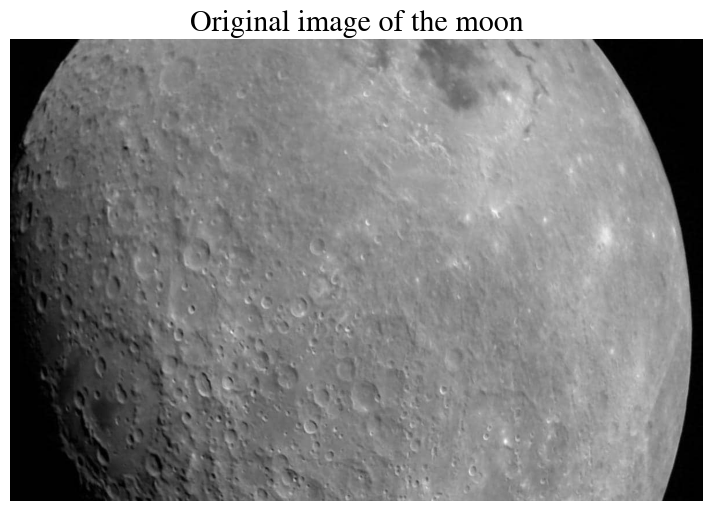

In [50]:
img1 = cv2.imread("First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg")
show_image(img1,"Original image of the moon",grayscale = True)

We define the function `quantize_intensity` which takes an input image and quantizes piexel values in bins as described above.

In [51]:
# Apply the tansformation via the following function  
def quantize_intensity(image):
  image[(image >= 0) & (image < 30)] = 10
  image[(image >= 30) & (image < 60)] = 20
  image[(image >= 60) & (image < 90)] = 50
  image[(image >= 90) & (image < 120)] = 70
  image[(image >= 120) & (image < 160)] = 100
  image[(image >= 160) & (image < 190)] = 140
  image[(image >= 190) & (image < 220)] = 180
  image[(image >= 220) & (image < 255)] = 200
  return image

As we can see, the limited range of intensity/brightness and the increase of contrast it produces is evident.

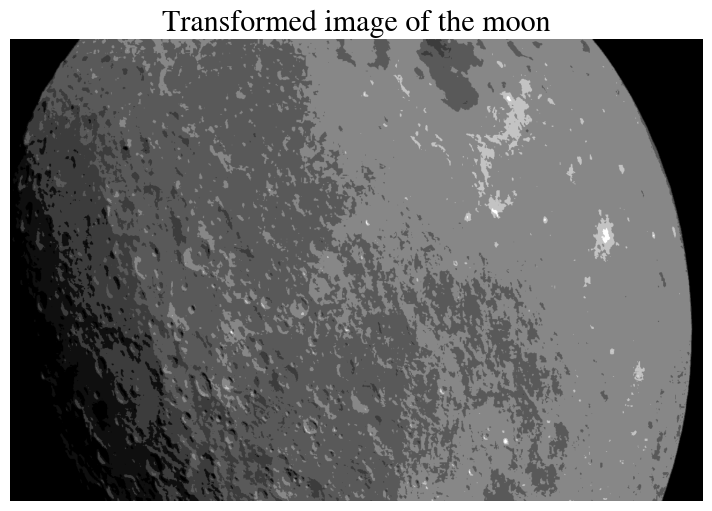

In [52]:
transformed_img1 = quantize_intensity(img1)
show_image(transformed_img1,"Transformed image of the moon", grayscale = True)

# **Exercise 2**
Propose a method for enhancing the image `“nature_dark_forest.jpg”` in terms of the
perceived light and color.

## *Solution*

The original image is presented below. As you can see the foreground appears extremely dark 

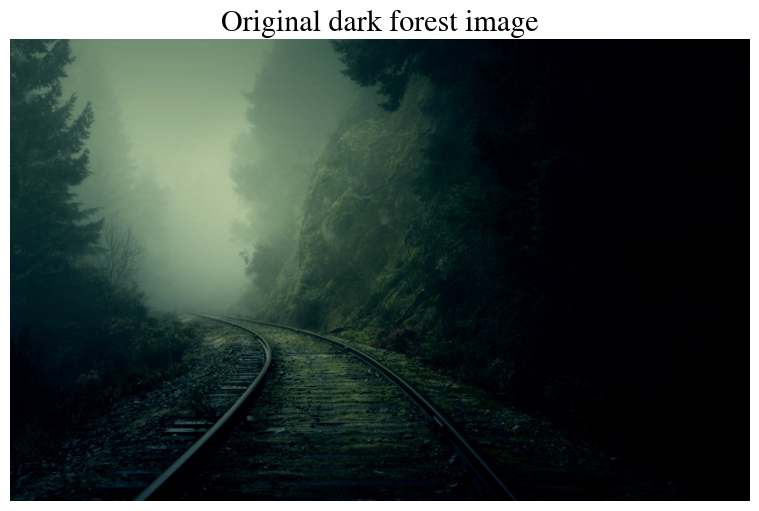

In [53]:
img2 = cv2.imread("nature_dark_forest.jpg")
show_image(img2,"Original dark forest image")

### Histogram Equalization for perceived light enchantment

To enchance an image in terms of perceived light and color we first need to switch the color Blue, Red, Green (BRG) color space to the Hue, Saturation, Value (HSV) space. HSV separates the chromatic information (hue) from the brightness/intensity information (value). Saturation is the amount of color, with a low saturation indicating a more neutral color and a high saturation indicating a more vibrant color. Below we plot the color spaces, along with their histograms.

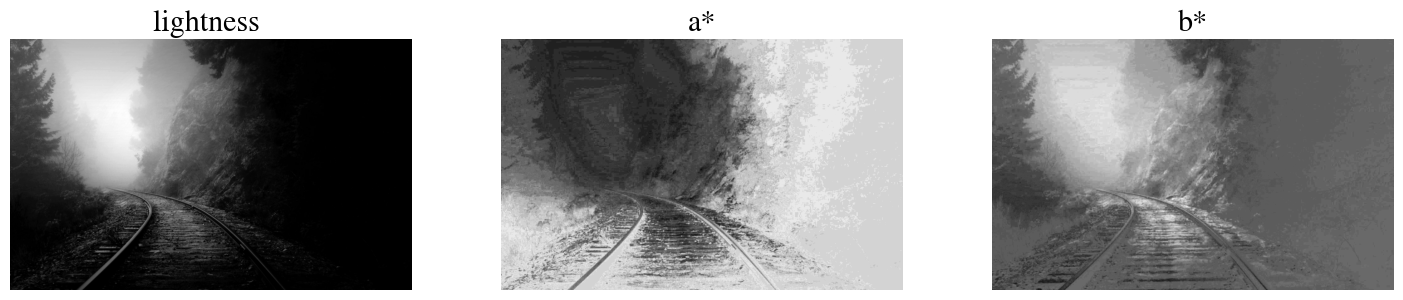

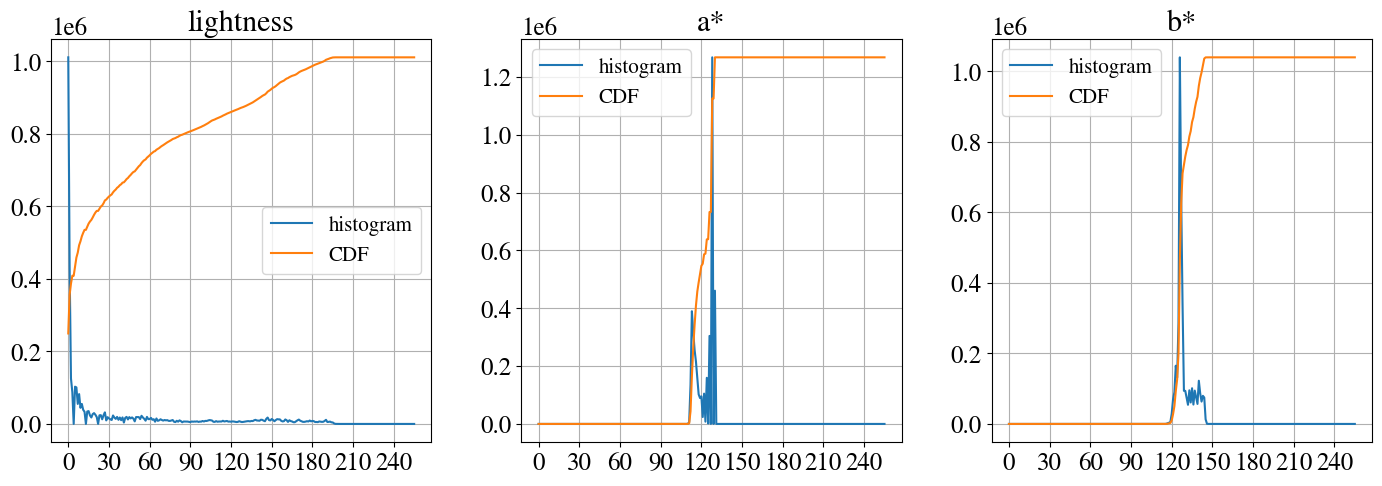

In [54]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2LAB)
show_channel_images(img2,["lightness ","a*","b*"])
plot_channel_histograms(img2, ["lightness","a*","b*"])

As we can see, in the value channel the majority of the pixels have very low intensity (close to  0). This is the channel we need to focus to enchance the  perceived light. Notice how the cummulative denstiy functions peaks very fast, to enchance the image we should strech the value range counts to cover 

In [55]:
def equalize_hist(img,select_channel = "all",grayscale = False):
  if grayscale:
    img = cv2.equalizeHist(img)
    return img
  else:
    if select_channel == "all":
      img[:,:,0] = cv2.equalizeHist(img[:,:,0])
      img[:,:,1] = cv2.equalizeHist(img[:,:,1])
      img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    elif select_channel == "first":
      img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    elif select_channel == "second":
      img[:,:,1] = cv2.equalizeHist(img[:,:,1])
    elif select_channel == "third":
      img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    else:
      raise ValueError("Invalid parameter")
    return img

In [56]:
def color_correction(img, a_scale=1.0, b_scale=1.0 , wb = False):
    # Split the LAB channels
    l, a, b = cv2.split(img)

    if wb:
      a_avg = np.mean(a)
      b_avg = np.mean(b)
      # Calculate the scaling factors needed to equalize the a and b channels
      a_scale = 128 / a_avg
      b_scale = 128 / b_avg
    # Apply the color correction to the a and b channels
    a = np.clip(a * a_scale, 0, 255).astype(np.uint8)
    b = np.clip(b * b_scale, 0, 255).astype(np.uint8)

    # Merge the LAB channels back into an image
    lab = cv2.merge((l, a, b))

    # Convert the image back to BGR color space
    return lab

In [57]:
img2 = color_correction(img2, wb = True)
img2 = equalize_hist(img2,select_channel = "first")

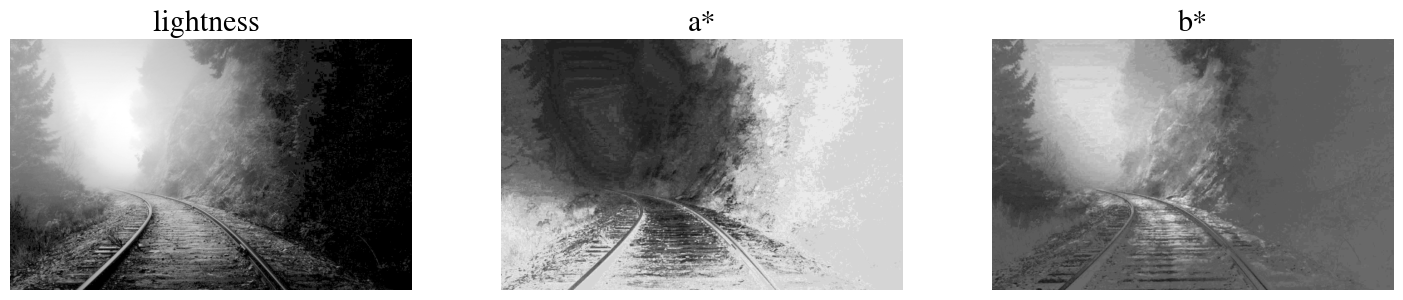

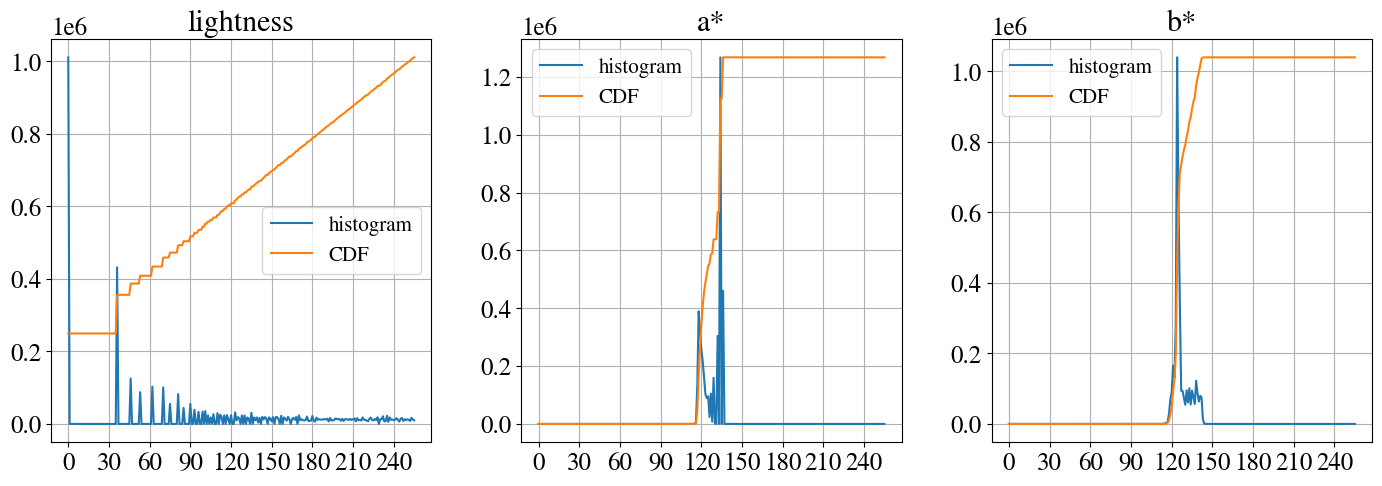

In [58]:
show_channel_images(img2,["lightness ","a*","b*"])
plot_channel_histograms(img2, ["lightness","a*","b*"])

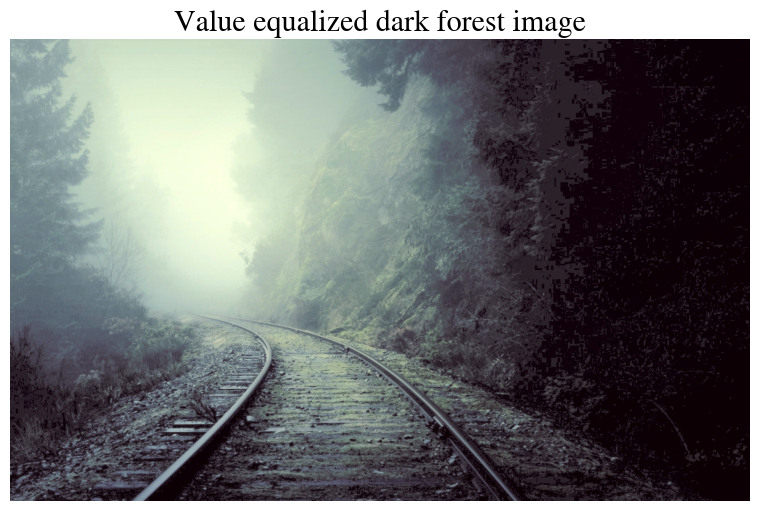

In [59]:
img2 = cv2.cvtColor(img2, cv2.COLOR_LAB2BGR)
show_image(img2,"Value equalized dark forest image")

# Exercise 3
Propose a method for improving the image `“pollen-500x430px-96dpi.jpg”` in  terms the perceived brightness.

## *Solution*

(430, 500, 3)
(430, 500)


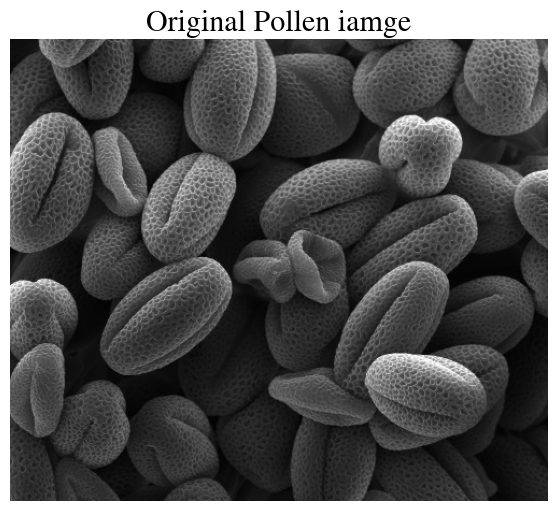

In [63]:
img3 = cv2.imread("pollen-500x430px-96dpi.jpg")
print(img3.shape)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
print(img3.shape)
show_image(img3,"Original Pollen iamge", grayscale = True)

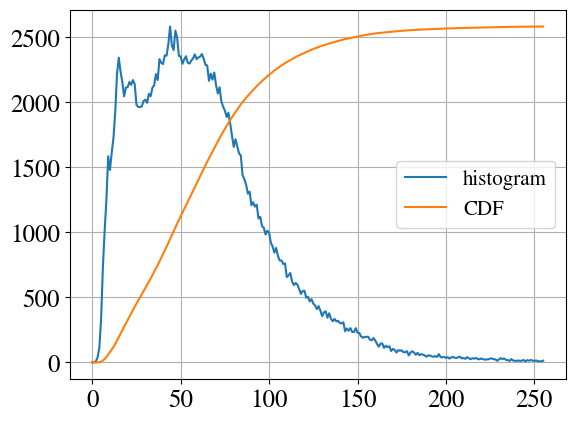

In [64]:
plot_channel_histograms(img3,grayscale=True)

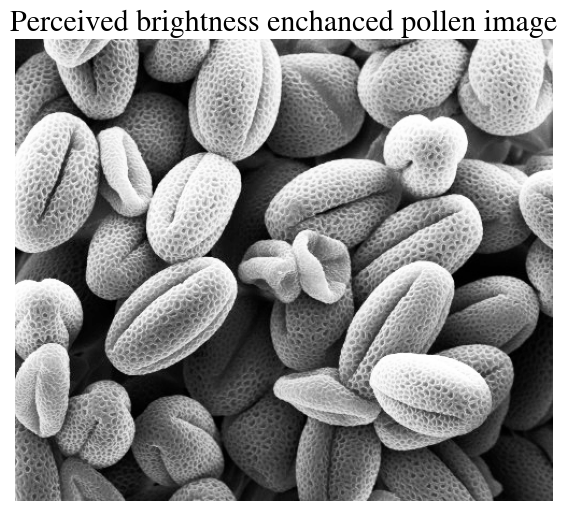

In [65]:
img3 = equalize_hist(img3,grayscale = True)
show_image(img3,"Perceived brightness enchanced pollen image")

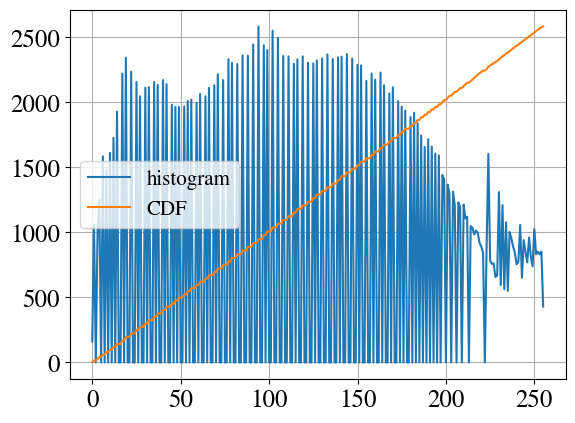

In [66]:
plot_channel_histograms(img3,grayscale=True)

# **Exercise 4**
Propose a method for sharpening the image `“First-photo-of-the-moon-from-Chandrayaan2_ISRO.jpg”`.

##*Solution*

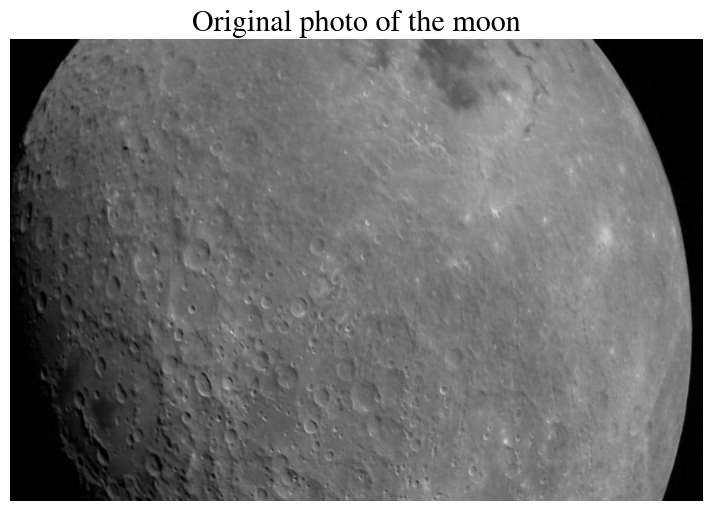

In [23]:
img4 = cv2.imread("First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg")
show_image(img4,"Original photo of the moon")

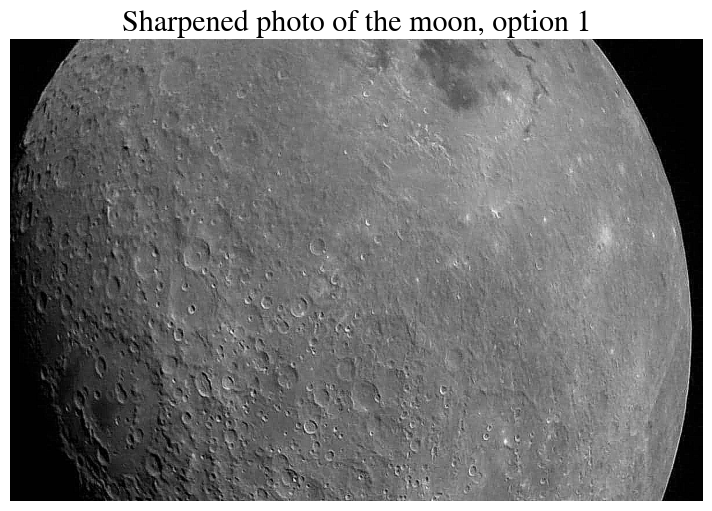

In [28]:
sharpening_kernel = matrix = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_1 = filtered_image = cv2.filter2D(img4, -1, sharpening_kernel)
show_image(sharpened_1,"Sharpened photo of the moon, option 1", grayscale = True)

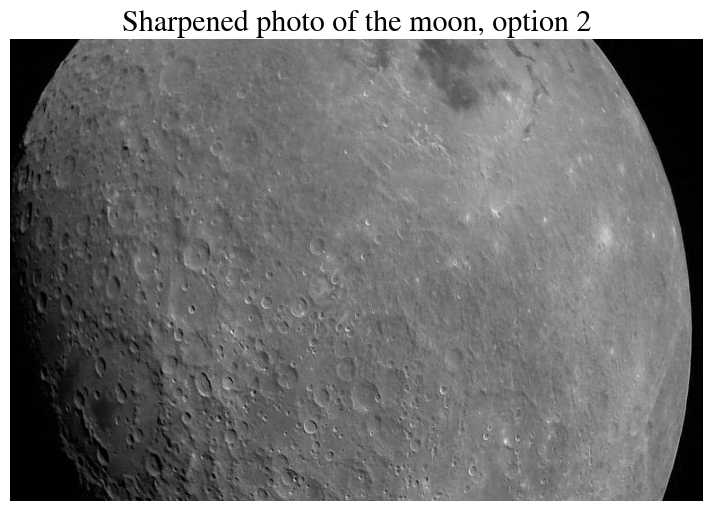

In [29]:
laplcian_kernel = matrix = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_2 = filtered_image = cv2.filter2D(img4, -1, laplcian_kernel)
show_image(sharpened_2,"Sharpened photo of the moon, option 2", grayscale = True)

# **Exercise 5**
One combined spatial enhancement methods (e.g. arithmetic operations, gray level
transformations, and/or sharpening spatial filters) to convert `“image_1”` to `“image_2”`.
- a) Try to guess the processing steps she adopted. [Note the dynamic range and brightness of
the enhanced image, and the noise introduced.]
- b) Propose a pipeline of processes with the aim of approximating `“image_1”` starting from
`“image_2”`.

# *Solution*

In [68]:
img5_start = cv2.imread("image_1.jpg")
img5_goal = cv2.imread("image_2.jpg")
# show_image(img5_start,"Starting image",grayscale = True)
# show_image(img5_goal,"Final image",grayscale = True)

In [35]:
print(img5_goal.shape)
print(img5_start.shape)

(641, 800)
(641, 800)


In [34]:
img5_goal = cv2.cvtColor(img5_goal, cv2.COLOR_BGR2GRAY)
img5_start = cv2.cvtColor(img5_start, cv2.COLOR_BGR2GRAY)
print(img5_goal.shape)
print(img5_start.shape)

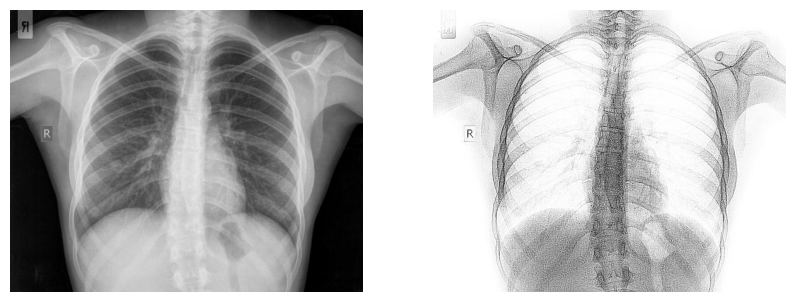

In [67]:
compare_images(img5_start,img5_goal,grayscale = True)

###*Solution a)*